In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
class LogisticRegression:
    
    def __init__(self, x, y, alpha, iters):
        self.x = x
        self.y = y
        self.alpha = alpha
        self.iters = iters
        _, features = x.shape
        self.w = np.zeros(shape=(features,1))
        self.b = 0
        self.m = len(x)
        self.cost_history = []
        self.col_dict = {0:'purple', 1:'yellow', 2:'green', 3:'red'}
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def cost_function(self, h):
        return np.sum((-self.y * np.log(h) - (1 - self.y) * np.log(1 - h))/self.m)
    
    def predict(self, data):
        pred = self.sigmoid(np.dot(data, self.w) + self.b)
        pred_label = []
        for p in pred:
            if p>0.5:
                pred_label.append(1)
            else:
                pred_label.append(0)
                
        return np.array(pred_label)
            
    
    def fit(self):
        
        cost_history = []
        
        for i in range(self.iters):
            ypred = self.sigmoid(np.dot(self.x, self.w) + self.b)
            cost = self.cost_function(ypred)
            self.cost_history.append(cost)
            grad_w = (np.dot(self.x.T, (ypred - self.y))) / self.m
            grad_b = (np.sum(ypred - self.y)) / self.m
            self.w -= self.alpha*grad_w
            self.b -= self.alpha*grad_b
            
        return self.b, self.w, self.cost_history
    
    def plot_cost(self):
     
        x_plot = np.array(np.arange(0, self.iters,1))
        plt.plot(x_plot, self.cost_history)

    def show(self, data):
        pred = self.predict(data)
        
        for i in range(len(data)):
            plt.scatter(data[i][0], data[i][1], color=self.col_dict[pred[i]])
   

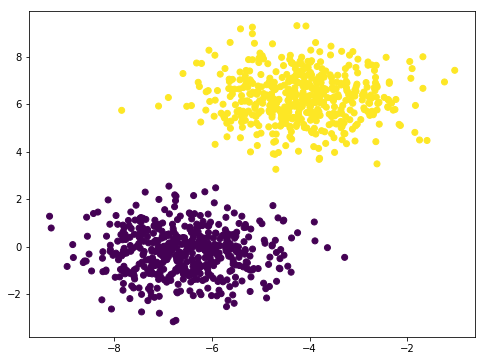

In [3]:
from sklearn.datasets.samples_generator import make_blobs
x, y = make_blobs(n_samples=1000, centers=2,random_state=1100)
fig1 = plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
ytrain_reshape = ytrain.reshape(len(xtrain),1)
ytest_reshape = ytest.reshape(len(xtest),1)

In [6]:
logreg = LogisticRegression(xtrain, ytrain_reshape, 0.09, 500)
b, w, cost_history = logreg.fit()

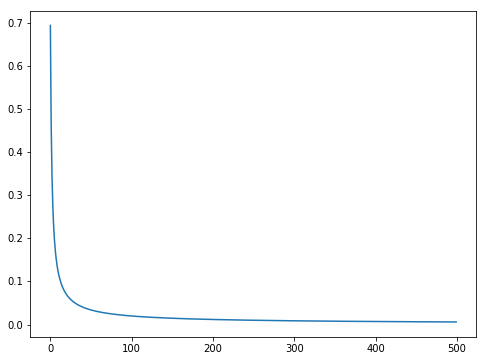

In [7]:
fig2 = plt.figure(figsize=(8,6))
logreg.plot_cost()

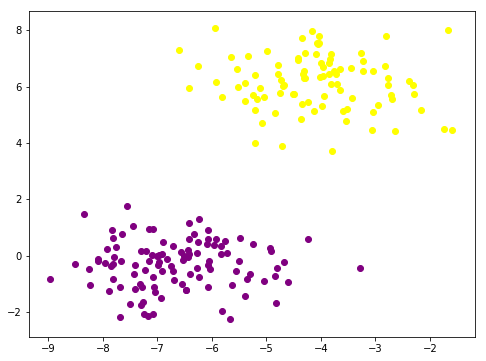

In [8]:
fig3 = plt.figure(figsize=(8,6))
logreg.show(xtest)